the cell below imports all repositories and sets a defined figure size

In [1]:
import numpy as np
import sep
import astropy.io.fits
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle
%matplotlib inline
#sets a distinct figure size
rcParams['figure.figsize'] = [10.,8.]

the cell below imports the fits file and opens the data

In [2]:

hdu_1 = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = hdu_1[0].data
data = data.byteswap(inplace=True).newbyteorder()

the below cell creates a mean and standard deviation for the data. it then plots the data in an image with mins and max set by the sums and differences of the mean and std deviations respectively

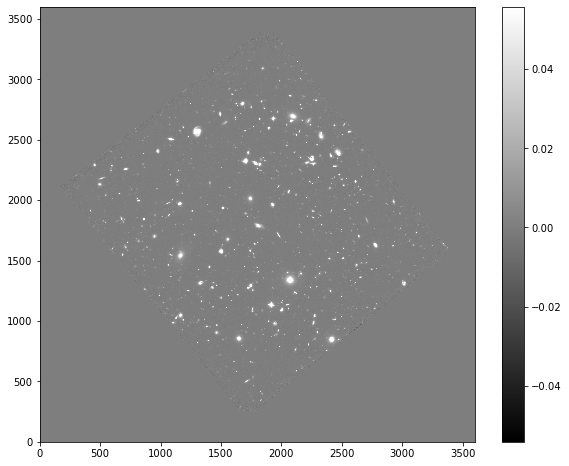

In [3]:

m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray',vmin=m-s, vmax = m+s, origin='lower')
plt.colorbar();
plt.savefig('final project outputs/image1_mean and std.png', dpi=600, orientation = 'landscape')

measures a background on the image data and prints the  global mean and global root mean squared values

In [4]:
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


the below function creates the background as a 2d array and the shows the background.

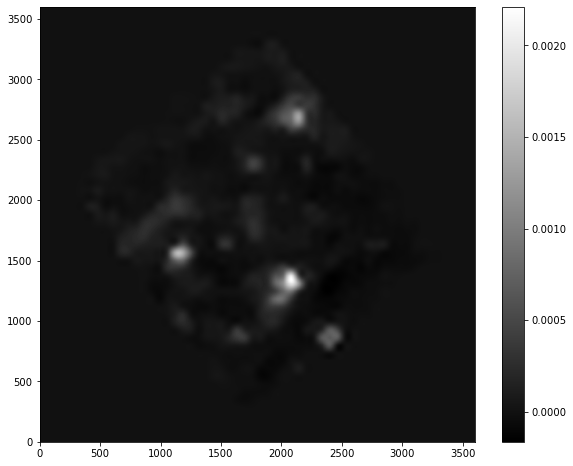

In [5]:
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('final project outputs/image2_background.png', dpi=600, orientation = 'landscape')

the below function evaluates the background root mean squared and shows it

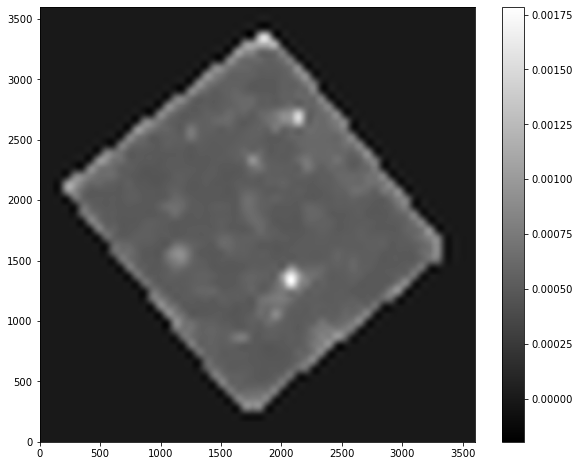

In [6]:
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('final project outputs/image3_background_rms.png', dpi=600, orientation = 'landscape')

the below function subtracts the background data from the data

In [7]:
data_sub = data - bkg

the below function extracts all of the objects from the background subtracted data

In [8]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

8640

this function below will plot ellipses around all detected objects coordinates on the image

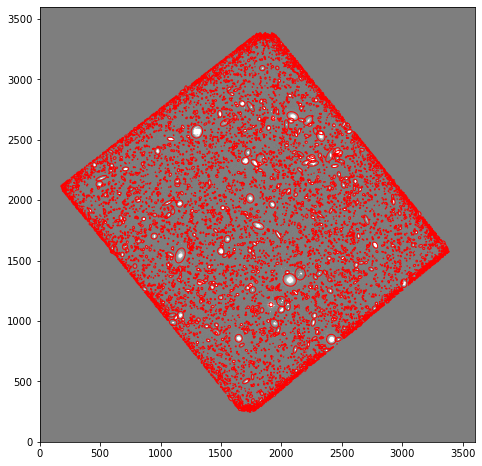

In [9]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width = 6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i]* 180. /np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('final project outputs/image4_object_ellipse.png', dpi=600, orientation = 'landscape')

prints all types of objects names and values

In [10]:
#objects.dtype.names

the below functions performas circular aperature photometry and print the flux values

In [11]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [12]:
for i in range(12):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877
object 10: flux = 0.104682 +/- 0.323559
object 11: flux = 0.044953 +/- 0.212041


the flux variables are the means, median, standard deviation, and largest outlier, respectively. the fluxdiv is how many standard deviations away from the mean we are. 

In [13]:
fluxMean = np.mean(flux)
fluxMedian = np.median(flux)
fluxStdDev = np.std(flux)
fluxOutlier = np.max(flux)
fluxDiv = fluxOutlier / fluxStdDev
print(fluxDiv)
#the text variables below are to create text with the respective flux data
meanText = "The Mean Value of Fluxes is:    " + "{:10.4f}".format(fluxMean)
medianText = "The Median value of Fluxes is: " + "{:10.4f}".format(fluxMedian)
stdDevText = "The Standard Deviation of Fluxes is: "  + "{:10.4f}".format(fluxStdDev)
lrgOutlierText = "The Largest Outlier in the Distribution is: "  + "{:10.4f}".format(fluxOutlier)
fluxDivText = "The Largest Outlier is" + "{:10.4f}".format(fluxDiv) + " standard deviations away from the mean."

87.33648894433719


the below function creates a histogram of our flux data, but it is zoomed in to show the histogram. the histogram is saved as an image file

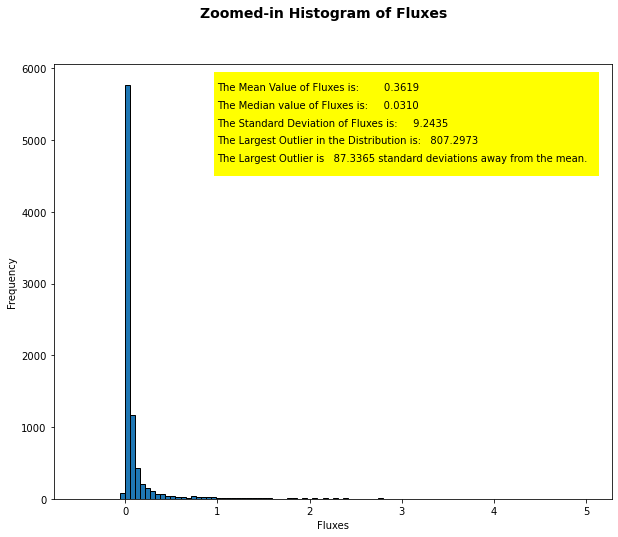

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
y_shift = 700 #adjust the vertical shift for text and rectangle background
fig.suptitle('Zoomed-in Histogram of Fluxes', fontsize=14, fontweight='bold')
ax.hist(flux, bins=100, range=(-0.5, 5), edgecolor='black')
ax.set_xlabel('Fluxes')
ax.set_ylabel('Frequency')
ax.add_patch(Rectangle((1.5, 4500+y_shift), 3.1, 45, fc ='none', ec ='yellow', lw = 100) ) #rectange background to highlight text box
#text display on histogram
ax.text(1,5000+y_shift, meanText, fontsize=10)
ax.text(1,4750+y_shift, medianText, fontsize=10)
ax.text(1,4500+y_shift, stdDevText, fontsize=10)
ax.text(1,4250+y_shift, lrgOutlierText, fontsize=10)
ax.text(1,4000+y_shift, fluxDivText, fontsize=10)

plt.show()
fig.savefig("final project outputs/zoomed_in_histogram.png", dpi=600, orientation = 'landscape')

the below function creates a histogram of our flux data, but it is a full view to show the histogram. the largest outlier is shown on the histogram. the histogram is saved as an image file

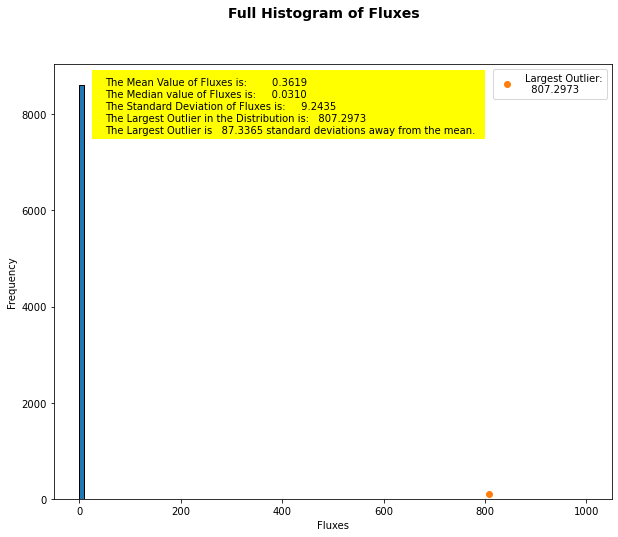

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
y_shift = 3600 #adjust the vertical shift for text and rectangle background
x_shift = -150 #adjust the horizontal shift for text and rectangle background

fig.suptitle('Full Histogram of Fluxes', fontsize=14, fontweight='bold')
ax.hist(flux, bins=100, range=(-0.5, 1000), edgecolor='black')
ax.set_xlabel('Fluxes')
ax.set_ylabel('Frequency')
ax.add_patch( Rectangle((225+x_shift, 4400+y_shift), 675, 400, fc ='none', ec ='yellow', lw = 50)) #rectange background to highlight text box

#text display on histogram
ax.text(200+x_shift,5000+y_shift, meanText, fontsize=10)
ax.text(200+x_shift,4750+y_shift, medianText, fontsize=10)
ax.text(200+x_shift,4500+y_shift, stdDevText, fontsize=10)
ax.text(200+x_shift,4250+y_shift, lrgOutlierText, fontsize=10)
ax.text(200+x_shift,4000+y_shift, fluxDivText, fontsize=10)

#positioning the largest outlier of the data
ax.errorbar(fluxOutlier, 100, fmt='o', label='Largest Outlier:\n'+ "{:10.4f}".format(fluxOutlier))
#show the legend
plt.legend()
plt.show()
fig.savefig("final project outputs/full_histogram.png", dpi=600, orientation = 'landscape')

the below code opens the addition fit files and establishes data variables for them

In [16]:
fdata_F125 = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
fdata_F160 = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

data_2 = fdata_F125[0].data
data_3 = fdata_F160[0].data



the below function rescales our data to be able to view the astronomical objects that are no inherently visible

In [17]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

the below function sets up new variables that are returned from the rescaled image function, while using data sources as an input parameter

In [18]:
data_1_res, d1min, d1max = rescale_image(data)
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)

the below function  limits the data values in the reschuduling

In [19]:
data_1_res[data_1_res<d1min] = d1min
data_1_res[data_2_res>d1max] = d1max
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max

the below function creates an rgb image using our limited data

In [20]:
rgb = np.zeros((data_1_res.shape[0], data_1_res.shape[1], 3))
rgb[:,:,0] = (data_1_res-d1min)/(d1max-d1min)
rgb[:,:,1] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,2] = (data_3_res-d3min)/(d3max-d3min)

the below function plots the figure showing our rgb image and saves it as png

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


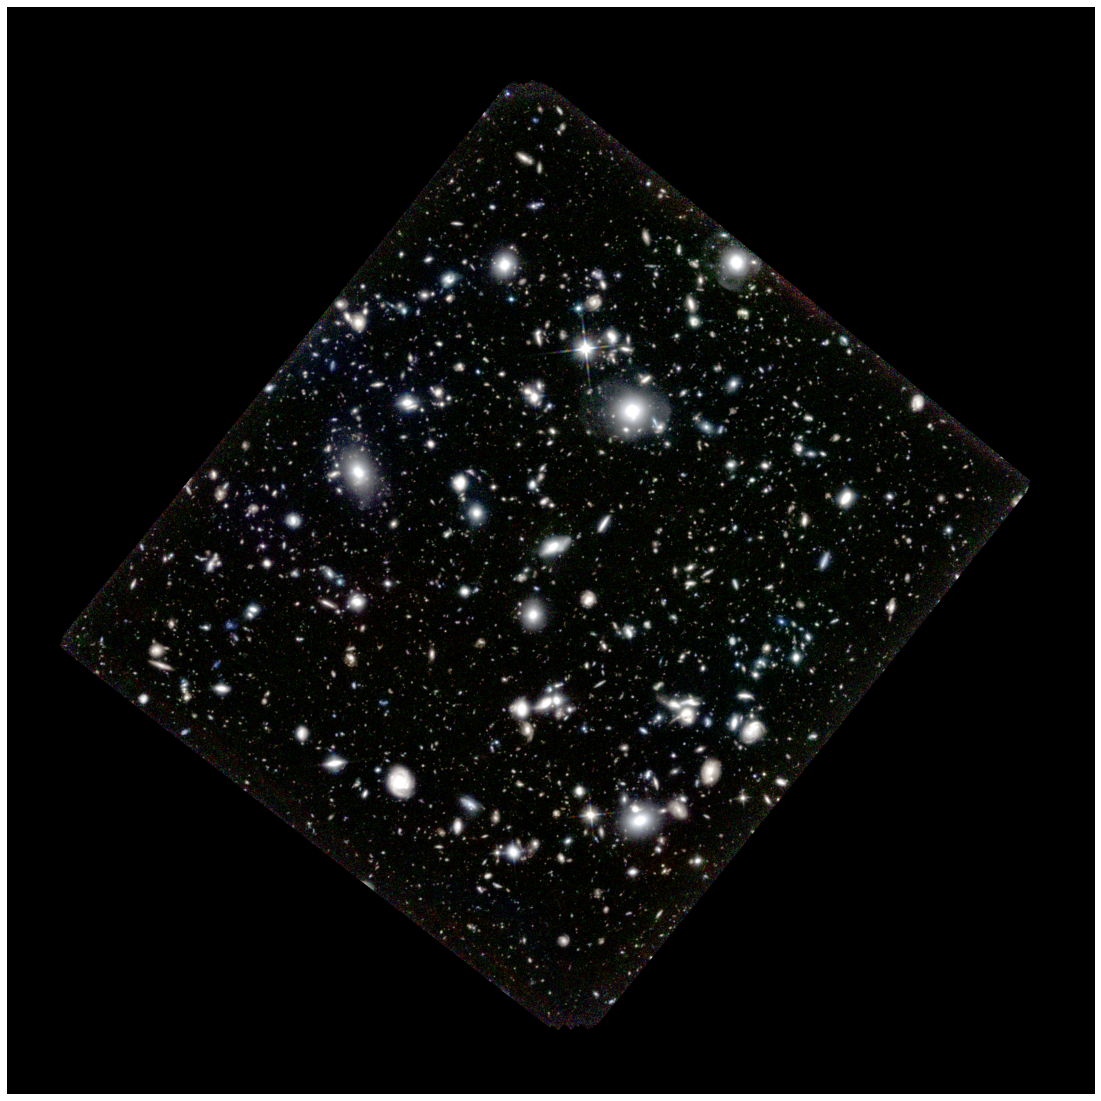

In [21]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig("final project outputs/jwst_image.png", bbox_inches='tight', pad_inches=0, dpi=600)